# **Convolutional Neural Network: Plants Classification**
**Artificial  Neural  Networks  and  Deep  Learning  -  a.y.  2022/2023**

*     <u>Marco Bendinelli</u>
> M.Sc. Computer Science Engineering at Politecnico di Milano
>
> E-mail: marco.bendinelli@mail.polimi.it
>
> Student ID : 10673478
>
> Codalab Nickname: "MarcoBendinelli"
>
> Codalab Group: "Zero Neurons Networks"
*     <u>Pietro Andrea Cirino</u>
> M.Sc. Mathematical Engineering at Politecnico di Milano
>
> E-mail: pietroandrea.cirino@mail.polimi.it
>
> Student ID : 10628055
>
> Codalab Nickname: "PietroCirino"
>
> Codalab Group: "Zero Neurons Networks"
*     <u>Marco Cayuela</u>
> M.Sc. Mathematical Engineering at Politecnico di Milano
>
> E-mail: marco.cayuela@mail.polimi.it
>
> Student ID : 10859184
>
> Codalab Nickname: "MarcoCayou"
>
> Codalab Group: "Zero Neurons Networks"

## Environment settings

### Connect to Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
%cd /gdrive/My Drive/Report/

/gdrive/My Drive/Report


### Libraries

In [3]:
import os
import random
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

tfk = tf.keras
tfkl = tf.keras.layers

print(tf.__version__)

2.9.2


### Random seed

In [4]:
# Random seed for reproducibility
SEED = 2710

random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.compat.v1.set_random_seed(SEED)

### Suppress warnings

In [5]:
import warnings
import logging

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
tf.get_logger().setLevel('INFO')
tf.autograph.set_verbosity(0)

tf.get_logger().setLevel(logging.ERROR)
tf.get_logger().setLevel('ERROR')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

### Unzip dataset

In [6]:
# Unzip dataset
!unzip training_dataset_homework1.zip

# Directory
DATASET_DIR = 'training_data_final' 
print(os.listdir(DATASET_DIR))

Archive:  training_dataset_homework1.zip
   creating: training_data_final/Species1/
  inflating: training_data_final/Species1/00000.jpg  
  inflating: training_data_final/Species1/00001.jpg  
  inflating: training_data_final/Species1/00002.jpg  
  inflating: training_data_final/Species1/00003.jpg  
  inflating: training_data_final/Species1/00004.jpg  
  inflating: training_data_final/Species1/00005.jpg  
  inflating: training_data_final/Species1/00006.jpg  
  inflating: training_data_final/Species1/00007.jpg  
  inflating: training_data_final/Species1/00008.jpg  
  inflating: training_data_final/Species1/00009.jpg  
  inflating: training_data_final/Species1/00010.jpg  
  inflating: training_data_final/Species1/00011.jpg  
  inflating: training_data_final/Species1/00012.jpg  
  inflating: training_data_final/Species1/00013.jpg  
  inflating: training_data_final/Species1/00014.jpg  
  inflating: training_data_final/Species1/00015.jpg  
  inflating: training_data_final/Species1/00016.jpg 

### Metadata

In [7]:
LABELS = ['Species1','Species2','Species3','Species4','Species5','Species6','Species7','Species8']
INPUT_SHAPE = (96, 96, 3)
IMAGE_SIZE = (INPUT_SHAPE[0], INPUT_SHAPE[1])
EPOCHS = 20
BATCH_SIZE = 32
NUM_CLASSES = len(LABELS)

### Plot Functions

In [8]:
histories = []
names = []
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [9]:
def monitor_loss(histories, names):
    assert len(histories) == len(names)
    plt.figure(figsize=(15,6))
    for idx in range(len(histories)):
        plt.plot(histories[idx]['loss'], alpha=.4, color=colors[idx], linestyle='--')
        plt.plot(histories[idx]['val_loss'], label=names[idx], alpha=.8, color=colors[idx]) 
    plt.title('Categorical Crossentropy')
    plt.legend(loc='upper right')
    plt.grid(alpha=.3)
    plt.show()

In [10]:
def monitor_accuracy(histories, names):
    assert len(histories) == len(names)
    plt.figure(figsize=(15,6))
    for idx in range(len(histories)):
        plt.plot(histories[idx]['accuracy'], alpha=.4, color=colors[idx], linestyle='--')
        plt.plot(histories[idx]['val_accuracy'], label=names[idx], alpha=.8, color=colors[idx]) 
    plt.title('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(alpha=.3)
    plt.show()

## VGG16

In [11]:
MODEL_NAME = 'VGG16'

#### Image Generators

In [12]:
from tensorflow.keras.applications.vgg16 import preprocess_input

# Constructor
train_data_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

# GeneratorS
train_gen = train_data_gen.flow_from_directory(
    directory=DATASET_DIR,
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='training',
    seed=SEED
)

valid_gen = train_data_gen.flow_from_directory(
    directory=DATASET_DIR,
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='validation',
    seed=SEED
)

Found 2836 images belonging to 8 classes.
Found 706 images belonging to 8 classes.


#### Transfer Learning Model



##### Download the Model

In [13]:
# Download the VGG16 model
supernet = tfk.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE
)
supernet.summary()

58889256/58889256 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                              

##### Rebuild the Top

In [14]:
# Use the supernet as feature extractor
supernet.trainable = False

# Rebuild the classifier
inputs = tfk.Input(shape=INPUT_SHAPE)
x = supernet(inputs)
x = tfkl.GlobalAveragePooling2D()(x)
outputs = tfkl.Dense(
    NUM_CLASSES, 
    activation='softmax',
    kernel_initializer = tfk.initializers.GlorotUniform(SEED))(x)

# Connect input and output through the Model class
model = tfk.Model(inputs=inputs, outputs=outputs, name=MODEL_NAME)

# Compile the model
model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 8)                 4104      
                                                                 
Total params: 14,718,792
Trainable params: 4,104
Non-trainable params: 14,714,688
_________________________________________________________________


### Training and Validation

In [15]:
# Train the model
history = model.fit(
    x = train_gen,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = valid_gen
).history

Epoch 1/20
89/89 [==============================] - 16s 101ms/step - loss: 4.1153 - accuracy: 0.2408 - val_loss: 2.4709 - val_accuracy: 0.3895
Epoch 2/20
89/89 [==============================] - 7s 78ms/step - loss: 1.8829 - accuracy: 0.4693 - val_loss: 1.7680 - val_accuracy: 0.4844
Epoch 3/20
89/89 [==============================] - 8s 89ms/step - loss: 1.3676 - accuracy: 0.5723 - val_loss: 1.5101 - val_accuracy: 0.5368
Epoch 4/20
89/89 [==============================] - 7s 75ms/step - loss: 1.1384 - accuracy: 0.6146 - val_loss: 1.3898 - val_accuracy: 0.5595
Epoch 5/20
89/89 [==============================] - 7s 75ms/step - loss: 0.9934 - accuracy: 0.6566 - val_loss: 1.2896 - val_accuracy: 0.5963
Epoch 6/20
89/89 [==============================] - 7s 76ms/step - loss: 0.8937 - accuracy: 0.6886 - val_loss: 1.2283 - val_accuracy: 0.6091
Epoch 7/20
89/89 [==============================] - 7s 77ms/step - loss: 0.8211 - accuracy: 0.7073 - val_loss: 1.1952 - val_accuracy: 0.6105
Epoch 8/20


### Plot history

In [16]:
histories.append(history)
names.append(MODEL_NAME)

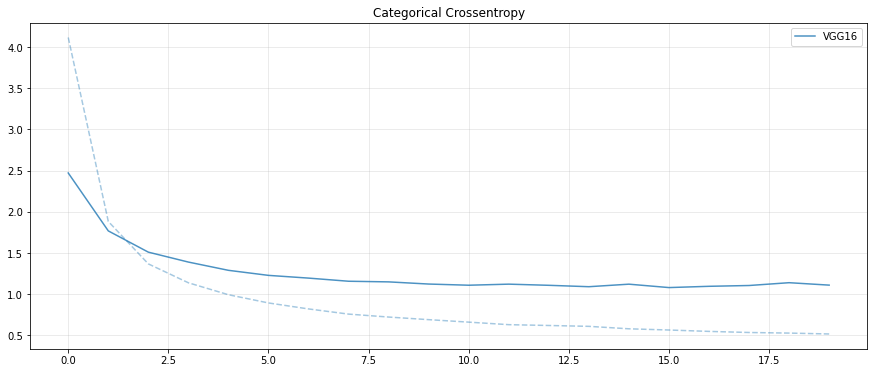

In [17]:
monitor_loss(histories, names)

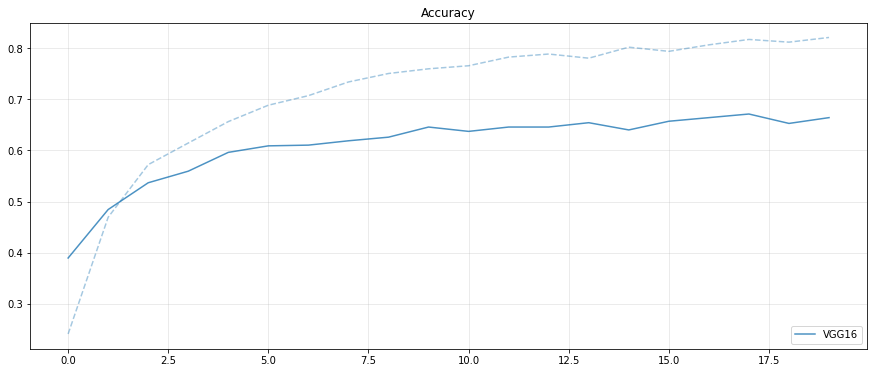

In [18]:
monitor_accuracy(histories, names)

In [19]:
del model

## Inception

In [20]:
MODEL_NAME = 'InceptionV3'

#### Image Generators

In [21]:
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Constructor
train_data_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

# GeneratorS
train_gen = train_data_gen.flow_from_directory(
    directory=DATASET_DIR,
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='training',
    seed=SEED
)

valid_gen = train_data_gen.flow_from_directory(
    directory=DATASET_DIR,
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='validation',
    seed=SEED
)

Found 2836 images belonging to 8 classes.
Found 706 images belonging to 8 classes.


#### Transfer Learning Model



##### Download the Model

In [22]:
# Download the Inception model
supernet = tfk.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE
)
supernet.summary()

87910968/87910968 [==============================] - 7s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 47, 47, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 47, 47, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activatio

##### Rebuild the Top

In [23]:
# Use the supernet as feature extractor
supernet.trainable = False

# Rebuild the classifier
inputs = tfk.Input(shape=INPUT_SHAPE)
x = supernet(inputs)
x = tfkl.GlobalAveragePooling2D()(x)
outputs = tfkl.Dense(
    NUM_CLASSES, 
    activation='softmax',
    kernel_initializer = tfk.initializers.GlorotUniform(SEED))(x)

# Connect input and output through the Model class
model = tfk.Model(inputs=inputs, outputs=outputs, name=MODEL_NAME)

# Compile the model
model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "InceptionV3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 8)                 16392     
                                                                 
Total params: 21,819,176
Trainable params: 16,392
Non-trainable params: 21,802,784
_________________________________________________________________


### Training and Validation

In [24]:
# Train the model
history = model.fit(
    x = train_gen,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = valid_gen
).history

Epoch 1/20
89/89 [==============================] - 17s 127ms/step - loss: 1.8356 - accuracy: 0.3226 - val_loss: 1.6301 - val_accuracy: 0.3909
Epoch 2/20
89/89 [==============================] - 7s 83ms/step - loss: 1.4003 - accuracy: 0.5000 - val_loss: 1.5356 - val_accuracy: 0.4518
Epoch 3/20
89/89 [==============================] - 8s 93ms/step - loss: 1.2469 - accuracy: 0.5695 - val_loss: 1.4871 - val_accuracy: 0.4603
Epoch 4/20
89/89 [==============================] - 7s 80ms/step - loss: 1.1501 - accuracy: 0.6079 - val_loss: 1.5071 - val_accuracy: 0.4603
Epoch 5/20
89/89 [==============================] - 7s 80ms/step - loss: 1.0823 - accuracy: 0.6301 - val_loss: 1.4831 - val_accuracy: 0.4603
Epoch 6/20
89/89 [==============================] - 7s 80ms/step - loss: 1.0264 - accuracy: 0.6400 - val_loss: 1.4682 - val_accuracy: 0.4830
Epoch 7/20
89/89 [==============================] - 7s 78ms/step - loss: 0.9796 - accuracy: 0.6608 - val_loss: 1.4943 - val_accuracy: 0.4561
Epoch 8/20


### Plot history

In [25]:
histories.append(history)
names.append(MODEL_NAME)

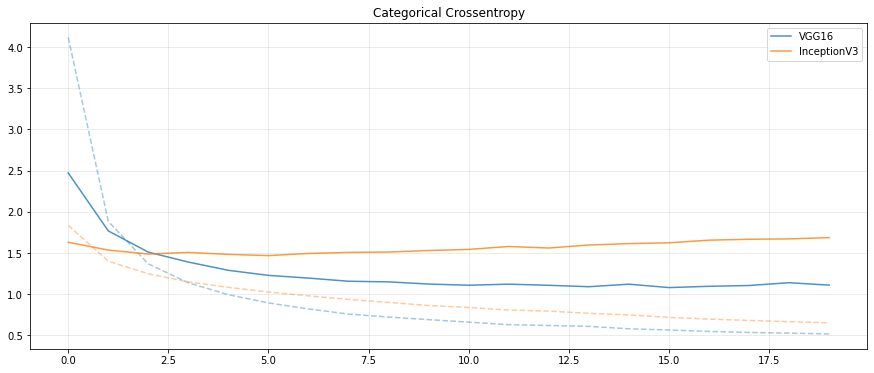

In [26]:
monitor_loss(histories, names)

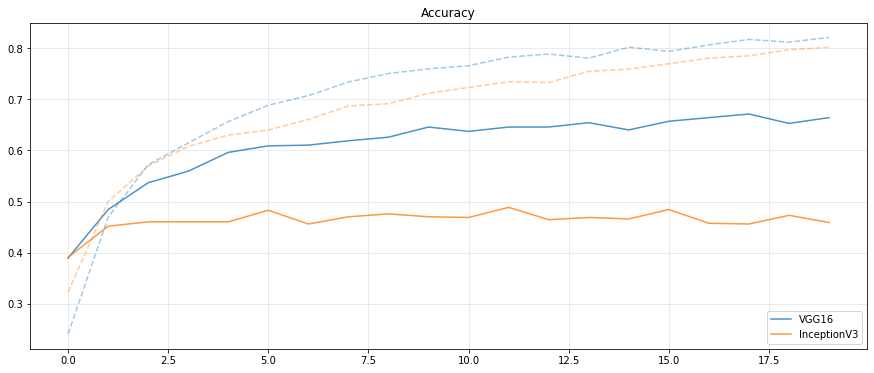

In [27]:
monitor_accuracy(histories, names)

In [28]:
del model

## ResNet

In [29]:
MODEL_NAME = 'ResNet50V2'

#### Image Generators

In [30]:
from tensorflow.keras.applications.resnet_v2 import preprocess_input

# Constructor
train_data_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

# GeneratorS
train_gen = train_data_gen.flow_from_directory(
    directory=DATASET_DIR,
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='training',
    seed=SEED
)

valid_gen = train_data_gen.flow_from_directory(
    directory=DATASET_DIR,
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='validation',
    seed=SEED
)

Found 2836 images belonging to 8 classes.
Found 706 images belonging to 8 classes.


#### Transfer Learning Model



##### Download the Model

In [31]:
# Download the model
supernet = tfk.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE
)
supernet.summary()

94668760/94668760 [==============================] - 7s 0us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 102, 102, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 48, 48, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 50, 50, 64)   0           ['conv1_conv[0][0]']             
                        

##### Rebuild the Top

In [32]:
# Use the supernet as feature extractor
supernet.trainable = False

# Rebuild the classifier
inputs = tfk.Input(shape=INPUT_SHAPE)
x = supernet(inputs)
x = tfkl.GlobalAveragePooling2D()(x)
outputs = tfkl.Dense(
    NUM_CLASSES, 
    activation='softmax',
    kernel_initializer = tfk.initializers.GlorotUniform(SEED))(x)

# Connect input and output through the Model class
model = tfk.Model(inputs=inputs, outputs=outputs, name=MODEL_NAME)

# Compile the model
model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "ResNet50V2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 resnet50v2 (Functional)     (None, 3, 3, 2048)        23564800  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 8)                 16392     
                                                                 
Total params: 23,581,192
Trainable params: 16,392
Non-trainable params: 23,564,800
_________________________________________________________________


### Training and Validation

In [33]:
# Train the model
history = model.fit(
    x = train_gen,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = valid_gen
).history

Epoch 1/20
89/89 [==============================] - 13s 101ms/step - loss: 1.6844 - accuracy: 0.3953 - val_loss: 1.4549 - val_accuracy: 0.4844
Epoch 2/20
89/89 [==============================] - 7s 84ms/step - loss: 1.2334 - accuracy: 0.5726 - val_loss: 1.3389 - val_accuracy: 0.5014
Epoch 3/20
89/89 [==============================] - 7s 80ms/step - loss: 1.0744 - accuracy: 0.6329 - val_loss: 1.2884 - val_accuracy: 0.5397
Epoch 4/20
89/89 [==============================] - 7s 82ms/step - loss: 0.9663 - accuracy: 0.6763 - val_loss: 1.2719 - val_accuracy: 0.5595
Epoch 5/20
89/89 [==============================] - 7s 81ms/step - loss: 0.8901 - accuracy: 0.7017 - val_loss: 1.2418 - val_accuracy: 0.5453
Epoch 6/20
89/89 [==============================] - 7s 80ms/step - loss: 0.8260 - accuracy: 0.7221 - val_loss: 1.2333 - val_accuracy: 0.5552
Epoch 7/20
89/89 [==============================] - 7s 82ms/step - loss: 0.7732 - accuracy: 0.7504 - val_loss: 1.2325 - val_accuracy: 0.5567
Epoch 8/20


### Plot history

In [34]:
histories.append(history)
names.append(MODEL_NAME)

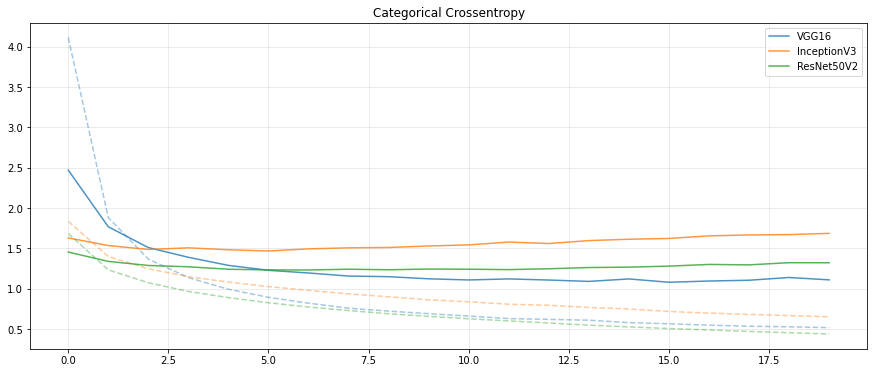

In [35]:
monitor_loss(histories, names)

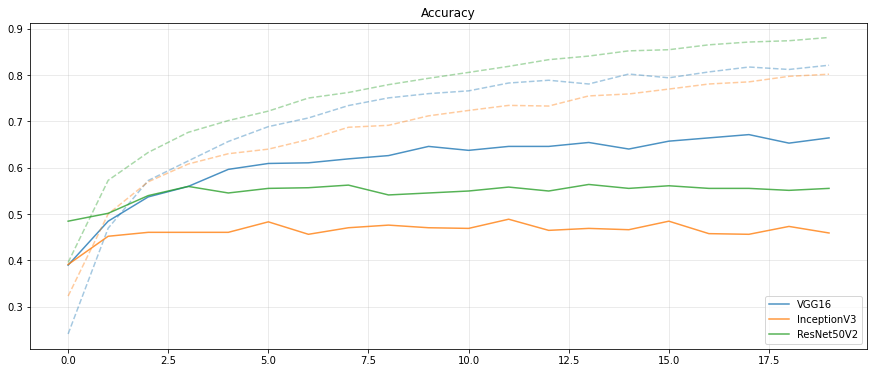

In [36]:
monitor_accuracy(histories, names)

In [37]:
del model

## DenseNet

In [38]:
MODEL_NAME = 'DenseNet121'

#### Image Generators

In [39]:
from tensorflow.keras.applications.densenet import preprocess_input

# Constructor
train_data_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

# GeneratorS
train_gen = train_data_gen.flow_from_directory(
    directory=DATASET_DIR,
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='training',
    seed=SEED
)

valid_gen = train_data_gen.flow_from_directory(
    directory=DATASET_DIR,
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='validation',
    seed=SEED
)

Found 2836 images belonging to 8 classes.
Found 706 images belonging to 8 classes.


#### Transfer Learning Model



##### Download the Model

In [40]:
# Download the model
supernet = tfk.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE
)
supernet.summary()

29084464/29084464 [==============================] - 3s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 102, 102, 3)  0          ['input_7[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 48, 48, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 48, 48, 64)   256         ['conv1/conv[0][0]']             
                       

##### Rebuild the Top

In [41]:
# Use the supernet as feature extractor
supernet.trainable = False

# Rebuild the classifier
inputs = tfk.Input(shape=INPUT_SHAPE)
x = supernet(inputs)
x = tfkl.GlobalAveragePooling2D()(x)
outputs = tfkl.Dense(
    NUM_CLASSES, 
    activation='softmax',
    kernel_initializer = tfk.initializers.GlorotUniform(SEED))(x)

# Connect input and output through the Model class
model = tfk.Model(inputs=inputs, outputs=outputs, name=MODEL_NAME)

# Compile the model
model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "DenseNet121"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 densenet121 (Functional)    (None, 3, 3, 1024)        7037504   
                                                                 
 global_average_pooling2d_3   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 8)                 8200      
                                                                 
Total params: 7,045,704
Trainable params: 8,200
Non-trainable params: 7,037,504
_________________________________________________________________


### Training and Validation

In [42]:
# Train the model
history = model.fit(
    x = train_gen,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = valid_gen
).history

Epoch 1/20
89/89 [==============================] - 18s 120ms/step - loss: 1.6006 - accuracy: 0.4351 - val_loss: 1.3517 - val_accuracy: 0.5467
Epoch 2/20
89/89 [==============================] - 7s 84ms/step - loss: 1.1159 - accuracy: 0.6188 - val_loss: 1.1737 - val_accuracy: 0.5864
Epoch 3/20
89/89 [==============================] - 7s 84ms/step - loss: 0.9530 - accuracy: 0.6795 - val_loss: 1.0655 - val_accuracy: 0.6275
Epoch 4/20
89/89 [==============================] - 8s 85ms/step - loss: 0.8538 - accuracy: 0.7197 - val_loss: 1.0038 - val_accuracy: 0.6572
Epoch 5/20
89/89 [==============================] - 7s 83ms/step - loss: 0.7769 - accuracy: 0.7468 - val_loss: 0.9953 - val_accuracy: 0.6586
Epoch 6/20
89/89 [==============================] - 8s 84ms/step - loss: 0.7366 - accuracy: 0.7585 - val_loss: 0.9723 - val_accuracy: 0.6544
Epoch 7/20
89/89 [==============================] - 7s 84ms/step - loss: 0.6944 - accuracy: 0.7722 - val_loss: 0.9405 - val_accuracy: 0.6629
Epoch 8/20


### Plot history

In [43]:
histories.append(history)
names.append(MODEL_NAME)

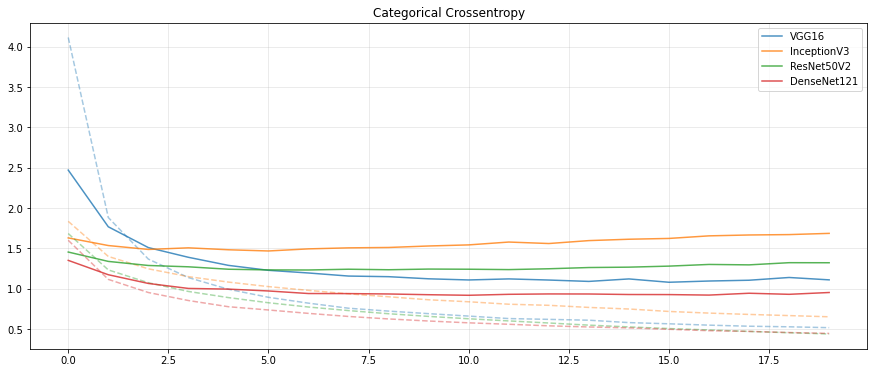

In [44]:
monitor_loss(histories, names)

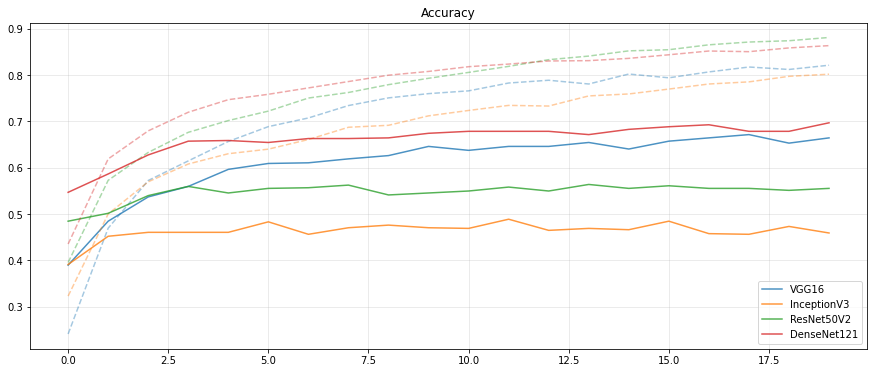

In [45]:
monitor_accuracy(histories, names)

In [46]:
del model

## EfficientNet

In [47]:
MODEL_NAME = 'EfficientNetB0'

#### Image Generators

In [48]:
from tensorflow.keras.applications.efficientnet import preprocess_input

# Constructor
train_data_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

# GeneratorS
train_gen = train_data_gen.flow_from_directory(
    directory=DATASET_DIR,
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='training',
    seed=SEED
)

valid_gen = train_data_gen.flow_from_directory(
    directory=DATASET_DIR,
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='validation',
    seed=SEED
)

Found 2836 images belonging to 8 classes.
Found 706 images belonging to 8 classes.


#### Transfer Learning Model



##### Download the Model

In [49]:
# Download the model
supernet = tfk.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE
)
supernet.summary()

16705208/16705208 [==============================] - 3s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 96, 96, 3)    0           ['input_9[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 96, 96, 3)    7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 96, 96, 3)    0           ['normalization[0][0]']          
                    

##### Rebuild the Top

In [50]:
# Use the supernet as feature extractor
supernet.trainable = False

# Rebuild the classifier
inputs = tfk.Input(shape=INPUT_SHAPE)
x = supernet(inputs)
x = tfkl.GlobalAveragePooling2D()(x)
outputs = tfkl.Dense(
    NUM_CLASSES, 
    activation='softmax',
    kernel_initializer = tfk.initializers.GlorotUniform(SEED))(x)

# Connect input and output through the Model class
model = tfk.Model(inputs=inputs, outputs=outputs, name=MODEL_NAME)

# Compile the model
model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "EfficientNetB0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 96, 96, 3)]       0         
                                                                 
 efficientnetb0 (Functional)  (None, 3, 3, 1280)       4049571   
                                                                 
 global_average_pooling2d_4   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 8)                 10248     
                                                                 
Total params: 4,059,819
Trainable params: 10,248
Non-trainable params: 4,049,571
_________________________________________________________________


### Training and Validation

In [51]:
# Train the model
history = model.fit(
    x = train_gen,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = valid_gen
).history

Epoch 1/20
89/89 [==============================] - 15s 93ms/step - loss: 1.5537 - accuracy: 0.4376 - val_loss: 1.2822 - val_accuracy: 0.5482
Epoch 2/20
89/89 [==============================] - 7s 79ms/step - loss: 1.1707 - accuracy: 0.6023 - val_loss: 1.1113 - val_accuracy: 0.6119
Epoch 3/20
89/89 [==============================] - 6s 71ms/step - loss: 1.0313 - accuracy: 0.6523 - val_loss: 1.0358 - val_accuracy: 0.6204
Epoch 4/20
89/89 [==============================] - 6s 70ms/step - loss: 0.9526 - accuracy: 0.6841 - val_loss: 0.9866 - val_accuracy: 0.6501
Epoch 5/20
89/89 [==============================] - 6s 71ms/step - loss: 0.9001 - accuracy: 0.6999 - val_loss: 0.9408 - val_accuracy: 0.6756
Epoch 6/20
89/89 [==============================] - 6s 70ms/step - loss: 0.8440 - accuracy: 0.7200 - val_loss: 0.9084 - val_accuracy: 0.6870
Epoch 7/20
89/89 [==============================] - 6s 69ms/step - loss: 0.8109 - accuracy: 0.7281 - val_loss: 0.8943 - val_accuracy: 0.6799
Epoch 8/20
8

### Plot history

In [52]:
histories.append(history)
names.append(MODEL_NAME)

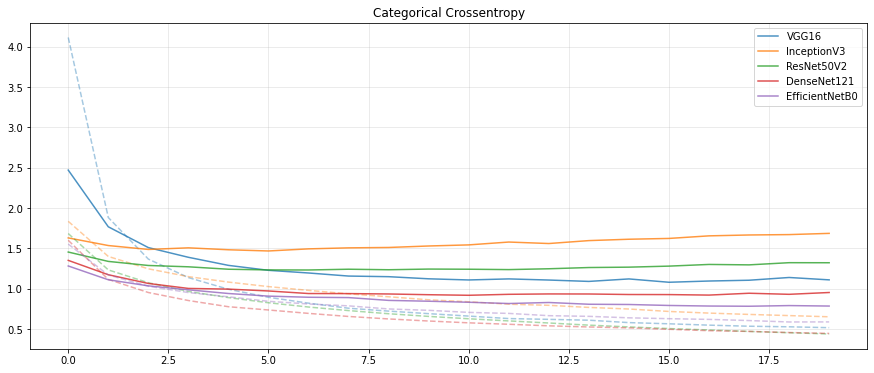

In [53]:
monitor_loss(histories, names)

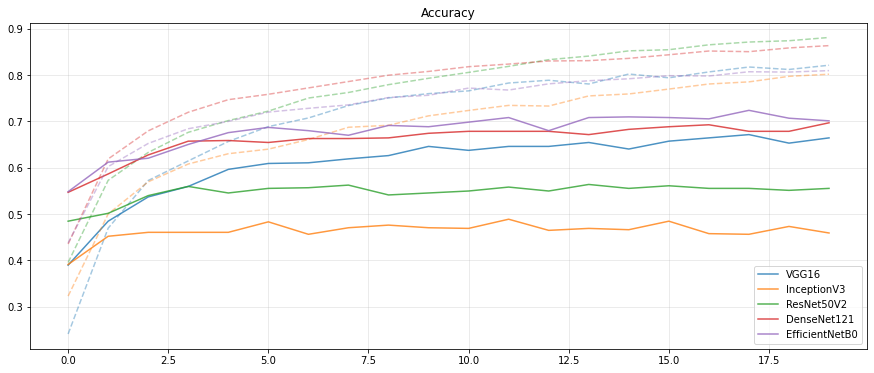

In [54]:
monitor_accuracy(histories, names)

In [55]:
del model

## RegNet

In [56]:
MODEL_NAME = 'RegNetX040'

#### Image Generators

In [57]:
# from tensorflow.keras.applications.efficientnet import preprocess_input

# Constructor
train_data_gen = ImageDataGenerator(
    # preprocessing_function=preprocess_input,
    validation_split=0.2
)

# GeneratorS
train_gen = train_data_gen.flow_from_directory(
    directory=DATASET_DIR,
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='training',
    seed=SEED
)

valid_gen = train_data_gen.flow_from_directory(
    directory=DATASET_DIR,
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='validation',
    seed=SEED
)

Found 2836 images belonging to 8 classes.
Found 706 images belonging to 8 classes.


#### Transfer Learning Model



##### Download the Model

In [58]:
# Download the model
supernet = tfk.applications.regnet.RegNetX320(
    include_top=False,
    include_preprocessing=True,
    weights="imagenet"
)
supernet.summary()

422542312/422542312 [==============================] - 28s 0us/step
Model: "regnetx320"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 regnetx320_prestem_rescaling (  (None, None, None,   0          ['input_11[0][0]']               
 Rescaling)                     3)                                                                
                                                                                                  
 regnetx320_stem_conv (Conv2D)  (None, None, None,   864         ['regnetx320_prestem_rescaling[0]
                     

##### Rebuild the Top

In [59]:
# Use the supernet as feature extractor
supernet.trainable = False

# Rebuild the classifier
inputs = tfk.Input(shape=INPUT_SHAPE)
x = supernet(inputs)
x = tfkl.GlobalAveragePooling2D()(x)
outputs = tfkl.Dense(
    NUM_CLASSES, 
    activation='softmax',
    kernel_initializer = tfk.initializers.GlorotUniform(SEED))(x)

# Connect input and output through the Model class
model = tfk.Model(inputs=inputs, outputs=outputs, name=MODEL_NAME)

# Compile the model
model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "RegNetX040"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 96, 96, 3)]       0         
                                                                 
 regnetx320 (Functional)     (None, None, None, 2520)  105452576 
                                                                 
 global_average_pooling2d_5   (None, 2520)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 8)                 20168     
                                                                 
Total params: 105,472,744
Trainable params: 20,168
Non-trainable params: 105,452,576
_________________________________________________________________


### Training and Validation

In [60]:
# Train the model
history = model.fit(
    x = train_gen,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = valid_gen
).history

Epoch 1/20
89/89 [==============================] - 30s 258ms/step - loss: 1.2102 - accuracy: 0.5635 - val_loss: 0.9582 - val_accuracy: 0.6700
Epoch 2/20
89/89 [==============================] - 16s 180ms/step - loss: 0.7721 - accuracy: 0.7370 - val_loss: 0.8027 - val_accuracy: 0.7139
Epoch 3/20
89/89 [==============================] - 16s 177ms/step - loss: 0.6642 - accuracy: 0.7775 - val_loss: 0.7308 - val_accuracy: 0.7408
Epoch 4/20
89/89 [==============================] - 16s 178ms/step - loss: 0.5722 - accuracy: 0.8117 - val_loss: 0.6740 - val_accuracy: 0.7620
Epoch 5/20
89/89 [==============================] - 16s 178ms/step - loss: 0.5124 - accuracy: 0.8399 - val_loss: 0.6584 - val_accuracy: 0.7677
Epoch 6/20
89/89 [==============================] - 16s 179ms/step - loss: 0.4678 - accuracy: 0.8547 - val_loss: 0.6115 - val_accuracy: 0.7819
Epoch 7/20
89/89 [==============================] - 16s 179ms/step - loss: 0.4379 - accuracy: 0.8614 - val_loss: 0.5899 - val_accuracy: 0.7833

### Plot history

In [61]:
histories.append(history)
names.append(MODEL_NAME)

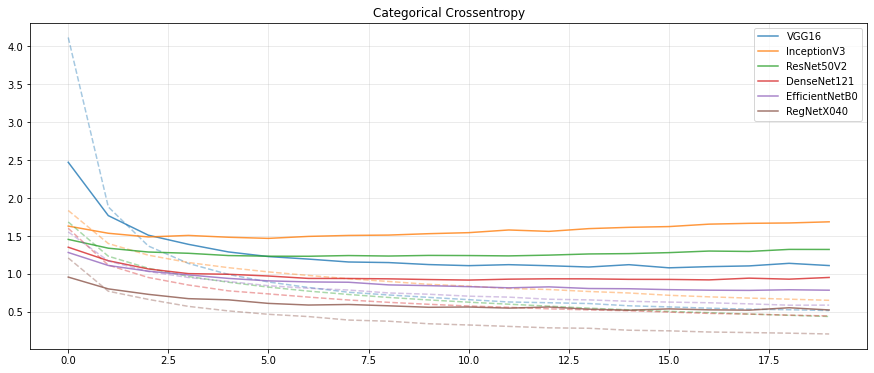

In [62]:
monitor_loss(histories, names)

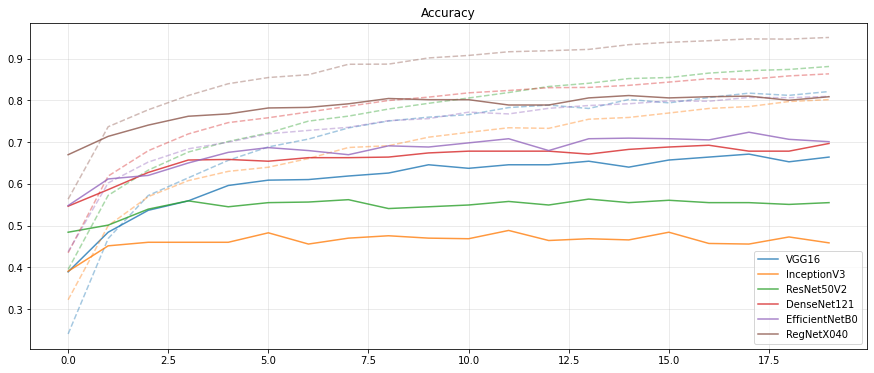

In [63]:
monitor_accuracy(histories, names)

In [64]:
del model